
# A/B Testing




# Caso práctico

**El Desafío (Optimizar una Campaña de Marketing)**: Imaginemos que somos parte de un equipo de marketing que gestiona una campaña publicitaria en línea para promocionar un producto o servicio. Como equipo, siempre estamos buscando formas de mejorar el rendimiento de nuestras campañas y aumentar la conversión de los usuarios en clientes. 

Para llevar a cabo este caso práctico usaremos dos conjuntos de datos, estos son: 


- Conjunto de Datos de la Campaña de Control:

   - Este conjunto de datos representa nuestra campaña tal como está configurada actualmente, es decir, el "grupo de control". Aquí, hemos estado ejecutando nuestra campaña publicitaria durante un período de tiempo determinado.

   - Contiene información sobre el gasto publicitario, el número de impresiones, el alcance, el número de clics en el sitio web, las búsquedas, las vistas de contenido, las adiciones al carrito y las compras realizadas durante varios días.

- Conjunto de Datos de la Campaña de Prueba (Test):

   - Este conjunto de datos representa una versión alternativa de nuestra campaña, el "grupo de prueba". Aquí, hemos realizado algunos cambios en nuestra estrategia publicitaria y hemos estado ejecutando esta versión durante el mismo período de tiempo que el grupo de control.
   
   - También contiene información similar al conjunto de control: gasto publicitario, impresiones, alcance, clics en el sitio web, búsquedas, vistas de contenido, adiciones al carrito y compras realizadas.

**Nuestro Objetivo**: Queremos determinar si los cambios en la estrategia de marketing tienen un impacto significativo en la conversión de usuarios en clientes. ¿La versión de prueba es realmente más efectiva o es solo una ilusión? Para responder a esta pregunta, exploraremos conceptos fundamentales de A/B Testing, como la selección de métricas adecuadas, el diseño del experimento, la recopilación de datos y la interpretación de resultados. A lo largo de esta lección, utilizaremos herramientas y técnicas de análisis de datos para tomar decisiones basadas en evidencia y mejorar nuestras estrategias de marketing.

En ambos conjuntos de datos tenemos las siguientes columnas: 


- **Campaign Name:** Esta columna indica el nombre de la campaña publicitaria o experimental a la que pertenece cada observación. En este caso, parece haber una campaña llamada "Control Campaign".

- **Date:** En esta columna se registra la fecha en la que se realizó cada observación o punto de datos. Las fechas están en formato "dd.mm.aaaa" (día.mes.año).

- **Spend [USD]:** Esta columna muestra la cantidad de dinero gastada en la campaña en dólares estadounidenses (USD) en cada día o período de observación. Representa el costo de ejecución de la campaña.

- **# of Impressions:** Aquí se registra el número de impresiones publicitarias generadas por la campaña en cada día. Una impresión es una visualización de un anuncio por parte de un usuario.

- **Reach:** Esta columna indica la cantidad de personas únicas alcanzadas por la campaña publicitaria en cada día. Es una métrica importante para medir el alcance de la campaña.

- **# of Website Clicks:** Registra el número de clics realizados en el sitio web vinculado a la campaña publicitaria en cada día. Es un indicador del tráfico generado por la campaña.

- **# of Searches:** Muestra la cantidad de búsquedas realizadas en relación con la campaña publicitaria en cada día. Puede representar el interés generado por la campaña.

- **# of View Content:** Esta columna indica el número de veces que se ha visto el contenido relacionado con la campaña en cada día. Puede referirse a páginas vistas o interacciones específicas con el contenido.

- **# of Add to Cart:** Registra la cantidad de veces que los usuarios agregaron productos al carrito de compras en el sitio web en relación con la campaña en cada día. Es una métrica relevante para el comercio electrónico.

- **# of Purchase:** Indica la cantidad de compras realizadas como resultado de la campaña publicitaria en cada día. Representa el logro principal de la campaña: la conversión de usuarios en clientes.


In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_control = pd.read_csv("./files/control_group.csv", sep =";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv("./files/test_group.csv", sep = ";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
df = pd.concat([df_control, df_test], axis = 0)
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# vamos a cambiar el nombre de las columnas para que no tengan nombres tan extraños
columnas = [col.lower().split("[")[0].replace("#", "").strip().replace(" ", "_") for col in df.columns]
df.columns = columnas

In [7]:
df.head()

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Tasa de Clicks

df['CTR'] = df['of_website_clicks'] / df['of_impressions']

# Tasa de Conversión
df["CR"] = df["of_purchase"] / df["of_website_clicks"]

df.head()

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase,CTR,CR
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


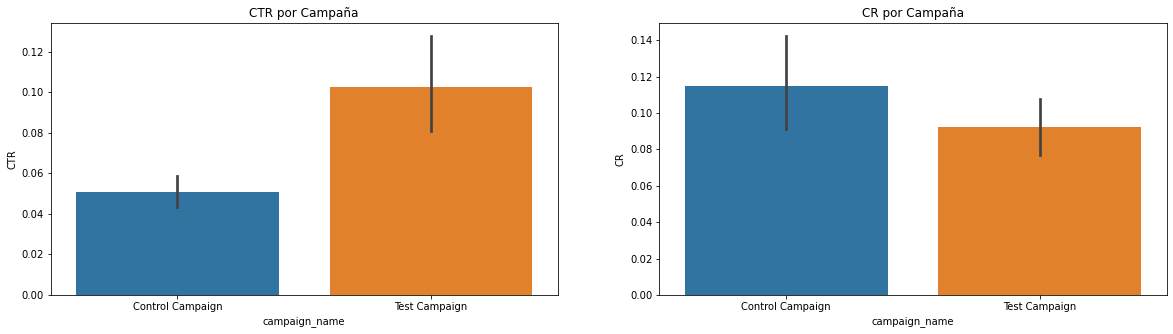

In [12]:
## Visualizacion 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="campaign_name", y="CTR", data=df, ax=axes[0]);
axes[0].set_title("CTR por Campaña");

sns.barplot(x="campaign_name", y="CR", data=df, ax=axes[1]);
axes[1].set_title("CR por Campaña");

In [14]:
## Eliminar los nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
nulos_esta_num


Index(['of_impressions', 'reach', 'of_website_clicks', 'of_searches',
       'of_view_content', 'of_add_to_cart', 'of_purchase', 'CTR', 'CR'],
      dtype='object')

In [ ]:
# si lo hiciera por separado
mediana_impressions = df["of_impressions"].median()
df["of_impressions"] = df["of_impressions"].fillna(mediana_impressions)

mediana_website_clicks = df["of_website_clicks"].median()
df["of_website_clicks"] = df["of_website_clicks"].fillna(mediana_website_clicks)

mediana_purchase = df["of_purchase"].median()
df["of_purchase"] = df["of_purchase"].fillna(mediana_purchase)

## y asi con todas las variables que tengan nulos

In [15]:
# si lo hiciera con un bucle para no tener que repetir el código
for columna in nulos_esta_num:
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)

df.isnull().sum()
    

campaign_name        0
date                 0
spend                0
of_impressions       0
reach                0
of_website_clicks    0
of_searches          0
of_view_content      0
of_add_to_cart       0
of_purchase          0
CTR                  0
CR                   0
dtype: int64

In [16]:
## Test Estadistico

## Supuesto de la normalidad (shapiro)
statistic, pvalue = stats.shapiro(df["CTR"])
if(pvalue < 0.05):
    print("La distribución de la variable CTR no es normal")
else:
    print("La distribución de la variable CTR es normal")

La distribución de la variable CTR no es normal


In [18]:
## Supuesto de la normalidad (shapiro)
statistic_c, pvalue_c = stats.shapiro(df["CR"])
if(pvalue_c < 0.05):
    print("La distribución de la variable CR no es normal")
else:
    print("La distribución de la variable CR es normal")

La distribución de la variable CR no es normal


In [21]:
## Homegeneidad de varianzas (Levene) 

control_group = df[df["campaign_name"] == "Control Campaign"]
test_group = df[df["campaign_name"] == "Test Campaign"]

## Hacer los dos grupos  
statistic, pvalue_h = stats.levene(control_group["CTR"], test_group["CTR"])
if(pvalue_h < 0.05):
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

Las varianzas no son iguales


####  SON EJEMPLOS DE SUPUESTOS PARA QUE VEAIS EL CODIGO, NO ESTÁ HECHO EL ANALISIS COMPLETO. 

In [24]:
## Como no cumplen los supuestos, vamos a hacer un test no parametrico
statistic, pvalue = stats.mannwhitneyu(control_group["CTR"], test_group["CTR"])

## Para interpretar los resultados:

## - Si p-value < 0.05, sugiere que hay diferencias significativas entre las medianas de las muestras.
## - Si p-value > 0.05, sugiere que no hay evidencia suficiente para concluir que las medianas son diferentes.
        
if pvalue < 0.05:
    print(f"Para la métrica CTR, las medianas son diferentes.")
else:
    print(f"Para la métrica CTR, las medianas son iguales.")
            

Para la métrica CTR, las medianas son diferentes.


In [25]:
## Si si cumple con los requisitos, vamos a hacer un test parametrico: T-Student
t_stat, p_ttest = ttest_ind(control_group['CR'], test_group['CR'])
print(f"Prueba t para CR entre Control y Test - p-valor: {p_ttest}")

if(pvalue < 0.05):
    print("Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras")
else:    
    print("No podemos afirmar que haya una diferencia significativa entre las dos muestras")


## **Interpretación:**

## - Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.

## - Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.


Prueba t para CR entre Control y Test - p-valor: 0.14875475513416359
Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras


## Interpretación de los resultados

> **Conclusión**: 
> 
> Resultado del análisis visual y estadístico de los datos podemos decir que la campaña de prueba logra captar con éxito más atención y estimula a los usuarios a hacer clic en el anuncio. 
> 
> Sin embargo, una vez que los usuarios hacen clic en el anuncio, su probabilidad de realizar una compra es similar en ambas campañas. 
> 